In [42]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [43]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()

In [44]:
X_train[0].shape

(28, 28)

In [45]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

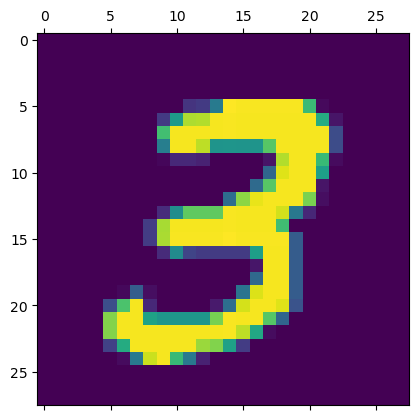

In [46]:
plt.matshow(X_train[7])

In [47]:
Y_train[7]

3

In [48]:
X_train = X_train/255
X_test = X_test/255

In [49]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [50]:
X_train_flattened.shape

(60000, 784)

In [51]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [52]:
X_test_flattened.shape

(10000, 784)

In [53]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs = 5)

Epoch 1/5


C:\Users\pranj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8107 - loss: 0.7316
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.9109 - loss: 0.3133
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.9194 - loss: 0.2812
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.9218 - loss: 0.2752
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.9289 - loss: 0.2621


In [54]:
model.evaluate(X_test_flattened, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.9155 - loss: 0.3032


[0.2675653100013733, 0.9265999794006348]

In [55]:
Y_predict = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


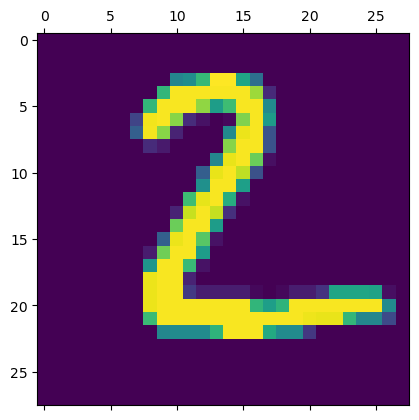

In [56]:
plt.matshow(X_test[1])

In [57]:
Y_predict[1]

array([4.85665113e-01, 8.06230400e-03, 9.99351501e-01, 2.32480958e-01,
       4.57026000e-10, 8.17043364e-01, 8.26835394e-01, 6.22691785e-13,
       1.03194594e-01, 1.23617061e-09], dtype=float32)

In [58]:
np.argmax(Y_predict[1])

2

In [59]:
Y_predict_labels = [np.argmax(i) for i in Y_predict]

In [61]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   6,    9,  933,   16,    9,    2,   12,    9,   33,    3],
       [   4,    0,   20,  931,    1,   20,    2,    8,   17,    7],
       [   1,    1,    4,    2,  932,    0,    9,    3,    9,   21],
       [  10,    3,    3,   36,   12,  774,   16,    4,   29,    5],
       [  13,    3,    6,    1,    7,   13,  912,    2,    1,    0],
       [   1,    5,   23,    9,   10,    0,    0,  949,    4,   27],
       [   6,   13,    6,   31,   10,   27,    9,   12,  855,    5],
       [  11,    7,    1,   14,   44,    6,    0,   23,    5,  898]])>

In [63]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8676 - loss: 0.4699
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9613 - loss: 0.1340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9750 - loss: 0.0845
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9819 - loss: 0.0623
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0494


In [64]:
model.evaluate(X_test_flattened, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9742 - loss: 0.0841


[0.07237100601196289, 0.9781000018119812]

In [66]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8724 - loss: 0.4491
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9623 - loss: 0.1272
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9748 - loss: 0.0854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9816 - loss: 0.0612
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9859 - loss: 0.0461


In [67]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9717 - loss: 0.0874


[0.07883879542350769, 0.9750000238418579]